In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/kaggle/input/cardiac-arrest-dataset/cardiac arrest dataset.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

/tmp/ipykernel_13/467714352.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


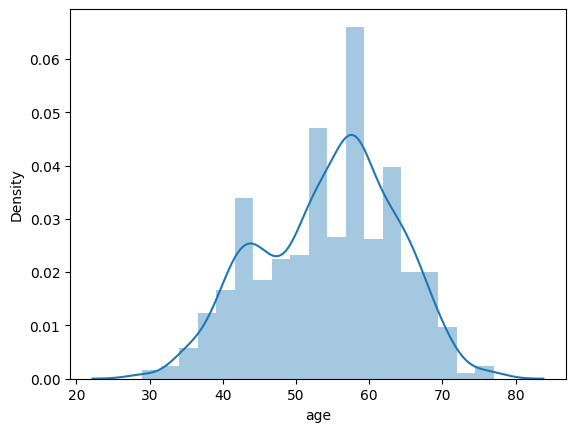

In [7]:
sns.distplot(data['age'])
plt.show()


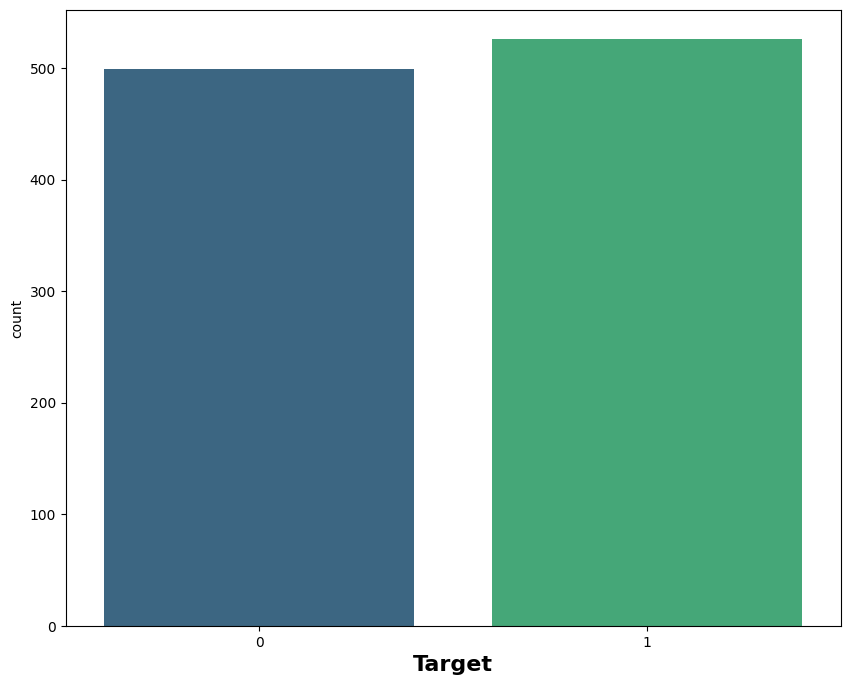

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'target',data =data,palette = 'viridis')
plt.xlabel("Target",fontweight = 'bold',size=16)
plt.show()

In [9]:
# separate train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('target',axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((717, 13), (308, 13))

In [10]:
X_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [11]:
y_train.isnull().sum()

0

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0
 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1
 0 1 1 1 1 0 1 1 0 1 1 0]


In [15]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.8668831168831169


In [16]:
## SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [17]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[112  33]
 [ 11 152]]


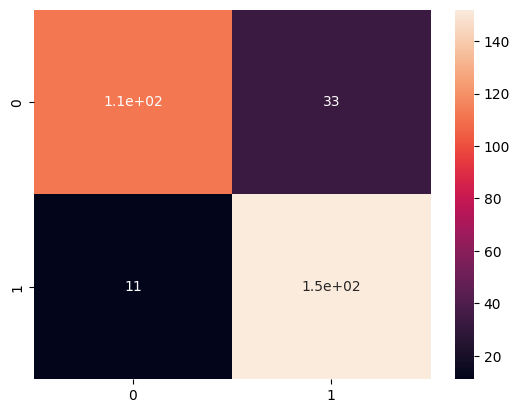

In [18]:
sns.heatmap(cm,annot=True)
plt.show()

In [19]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc2}")

Accuracy score: 0.8571428571428571


In [20]:
## K-NN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[126  19]
 [ 19 144]]


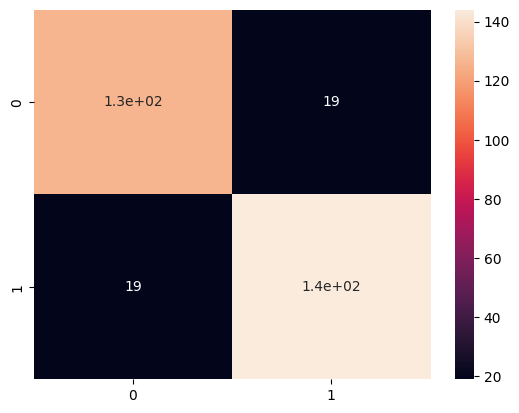

In [23]:
sns.heatmap(cm,annot=True)
plt.show()

In [24]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")

Accuracy score: 0.8766233766233766


In [25]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[118  27]
 [ 21 142]]


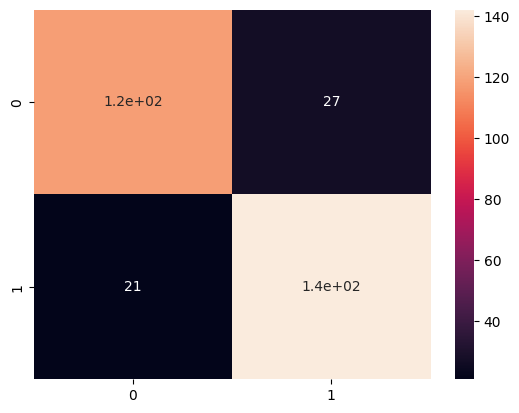

In [27]:
sns.heatmap(cm,annot=True)
plt.show()

In [28]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.8441558441558441


In [29]:
## Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc5}")

Accuracy score: 0.9902597402597403


In [30]:
## Step 1: Evaluate with More Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9902597402597403
Confusion Matrix:
 [[145   0]
 [  3 160]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.98      0.99       163

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



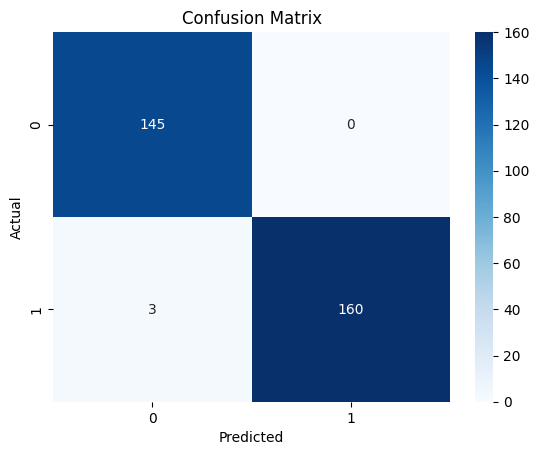

In [31]:
## Step 2: Error Analysis
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [32]:
## misclassified rows
misclassified = X_test[y_pred != y_test]
print(misclassified)

[[ 0.27717522 -1.53312338 -0.91725155 -0.66444387  2.14934323 -0.42111744
   0.92419637  0.59723284  1.42763286 -0.39793321  0.9790949  -0.73793656
  -0.51108759]
 [ 0.27717522 -1.53312338 -0.91725155 -0.66444387  2.14934323 -0.42111744
   0.92419637  0.59723284  1.42763286 -0.39793321  0.9790949  -0.73793656
  -0.51108759]
 [ 0.27717522 -1.53312338 -0.91725155 -0.66444387  2.14934323 -0.42111744
   0.92419637  0.59723284  1.42763286 -0.39793321  0.9790949  -0.73793656
  -0.51108759]]


In [33]:
X = data.drop('target', axis=1)
y = data['target']  

In [34]:
## Cross-Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())

Cross-validation scores: [0.9804878 1.        1.        1.        1.       ]
Average CV score: 0.9960975609756098
